# Atmospheric* Data Science Workshops
<div style="text-align: right"> *and oceanic </div>

## Python : xArray and multidimensionnal gridded data

Pascal Bourgault, 05-04-2019


In this workshop we will use `xArray` and friends to read, analyse, plot and write multidimensionnal gridded data.

- `xArray` is built on `Pandas`, a lot of the functionalities are similar and use similar syntax.
- It is coded to follow the [CF conventions](http://cfconventions.org/), the same that define de `netCDF` format, making fully compatible with `nc` files.
- We can already read `netCDF` files to `numpy` arrays through  `scipy` or `netCDF4`, but `xArray` unleashes Python's power and blends in with `matplotlib` and `pandas` to offer a **perfect** data exploration tool for the natural sciences.

`xArray` doesn't come with the default anaconda distribution, we install it first! I reccommend using the anaconda navigator or a terminal, but you can run the following line if you feel adventurous:

In [1]:
#!conda install xarray

Now we can import what we will need for the first part:

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## Part one : A simple netCDF file

In [3]:
data = xr.open_dataset('/aos/home/pascalb/Downloads/DurackandWijffels_GlobalOceanChanges_1950-2000.nc')

In [4]:
data

<xarray.Dataset>
Dimensions:                (bounds: 2, depth: 66, latitude: 141, longitude: 180, time: 1)
Coordinates:
  * time                   (time) datetime64[ns] 1974-12-31T12:00:00
  * depth                  (depth) float64 0.0 5.0 10.0 ... 1.9e+03 2e+03
  * latitude               (latitude) float64 -70.0 -69.0 -68.0 ... 69.0 70.0
  * longitude              (longitude) float64 0.0 2.0 4.0 ... 354.0 356.0 358.0
Dimensions without coordinates: bounds
Data variables:
    climatology_bounds     (time, bounds) float64 ...
    depth_bnds             (depth, bounds) float64 ...
    lat_bnds               (latitude, bounds) float64 ...
    lon_bnds               (longitude, bounds) float64 ...
    thetao_mean            (time, depth, latitude, longitude) float32 ...
    thetao_change          (time, depth, latitude, longitude) float32 ...
    thetao_change_error    (time, depth, latitude, longitude) float32 ...
    salinity_mean          (time, depth, latitude, longitude) float32 ...
 

In [6]:
data.thetao_change.sel()

<xarray.DataArray 'thetao_change' (time: 1, depth: 66, latitude: 141, longitude: 180)>
[1675080 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1974-12-31T12:00:00
  * depth      (depth) float64 0.0 5.0 10.0 20.0 ... 1.8e+03 1.9e+03 2e+03
  * latitude   (latitude) float64 -70.0 -69.0 -68.0 -67.0 ... 68.0 69.0 70.0
  * longitude  (longitude) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
Attributes:
    units:          degree_C
    units_long:     degree_C/50yrs
    long_name:      Potential Temperature change 1950-2000
    standard_name:  change_over_time_in_sea_water_potential_temperature
    valid_range:    [-2.  2.]
    comment:        Error threshold: 2.0

`xArray` mainly uses two objects : `DataArray` and `Dataset`.

 - A `DataArray` is a named N-D array with named axes or *dimensions*.
 - A `Dataset` contains many `DataArray` instances. If a `DataArray` as only one dimension, it can be promoted to a coordinate. 
 By default, a `DataArray` with the same name as its dimension is automatically promoted to coordinate.

 - Both can have any number of *attributes*. The CF conventions regulate some of them. Most important for us are : `units` and `long_name` (or `standard_name` if it is absent).

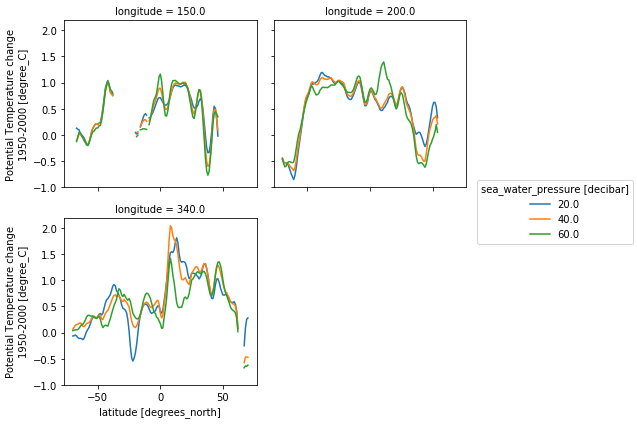

In [9]:
D.thetao_change.sel(depth=[20, 40, 60], longitude=[150, 200, 340]).plot(hue='depth', col='longitude', col_wrap=2)